In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

import sklearn 
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [28]:
species = iris.target_names

In [3]:
y = iris.target
X = iris.data

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
y_predict = knn.predict(X_test)

In [12]:
print(knn.score(X_test,y_test))

1.0


In [14]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)

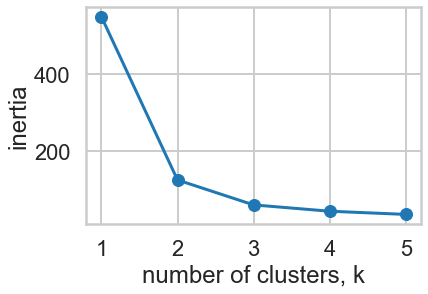

36.77092255892256


In [27]:
import matplotlib.pyplot as plt
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train,y_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

print(model.inertia_)

In [30]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X_test)


# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'iris':y_test})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['iris'])

# Display ct
print(ct)


iris     0  1   2
labels           
0       10  0   0
1        0  7  10
2        0  3   0
